In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils.plot import plot, ProfileBuilder, plot_profile, plot_temp_trend
from utils.analyze import load_data
%matplotlib notebook

In [15]:
directory = "edge_kleber_wasser"

In [16]:
x, y, z, T, t, settings = load_data(directory)
x = x[0]
y = y[0]
print("Loaded {} data sets.\n\nSettings:".format(len(z)))
settings[0]

Loaded 5 data sets.

Settings:


{'change_direction': False,
 'data_logger_channel': 101,
 'data_points': 169,
 'direction': ('x', 'y'),
 'extent': ((9.0, 26, 0.1), (13, 30, 0.1)),
 'mode': 'absolute',
 'sampling_time': 0.256,
 'sensors': ['1161']}

<IPython.core.display.Javascript object>


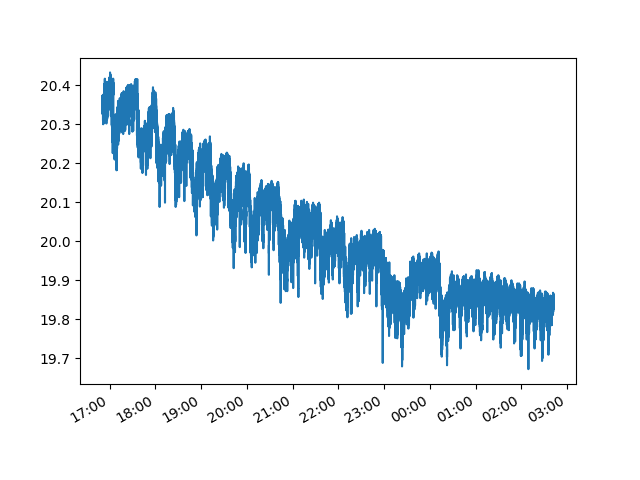

In [17]:
_ = plot_temp_trend(t, T)

<IPython.core.display.Javascript object>


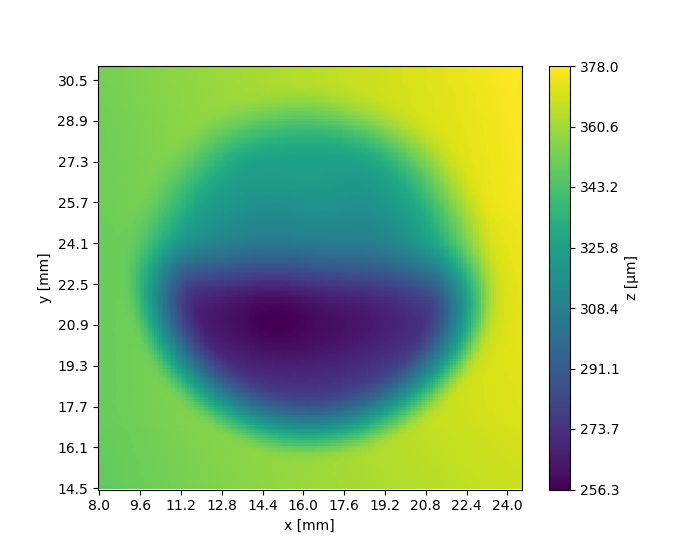

<IPython.core.display.Javascript object>


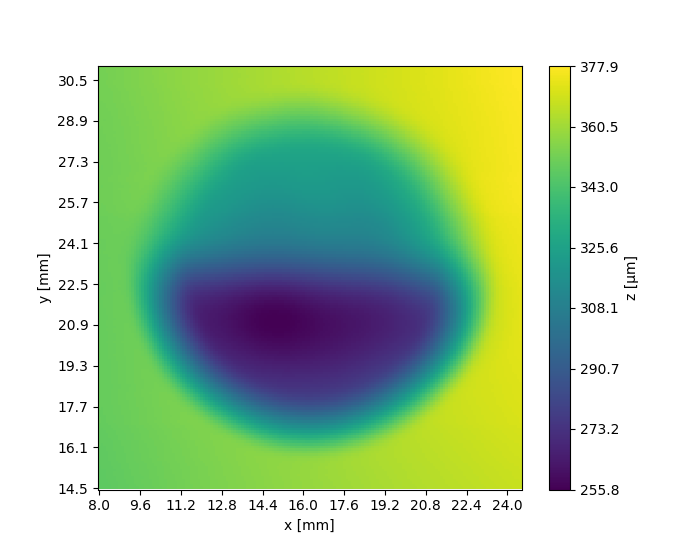

<IPython.core.display.Javascript object>


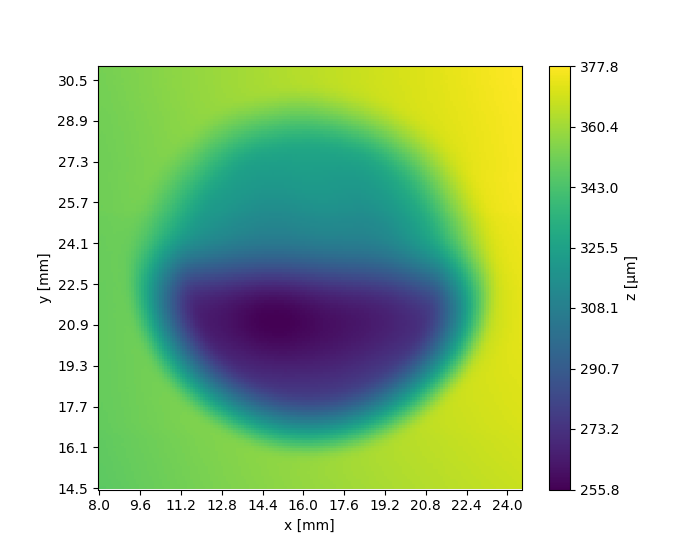

<IPython.core.display.Javascript object>


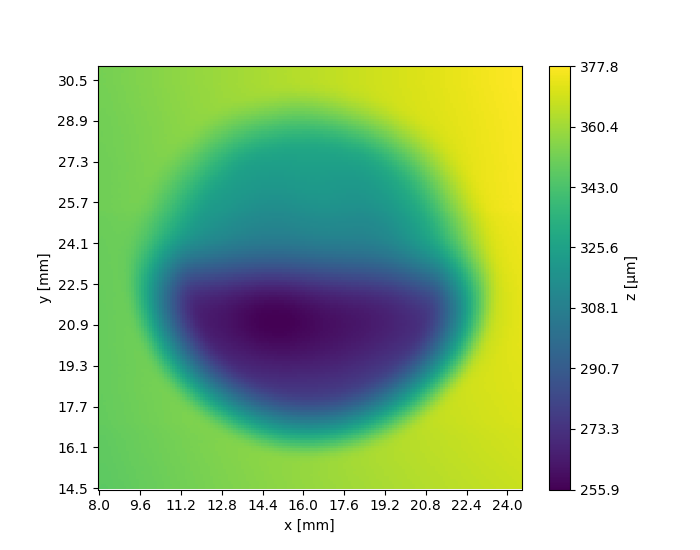

<IPython.core.display.Javascript object>


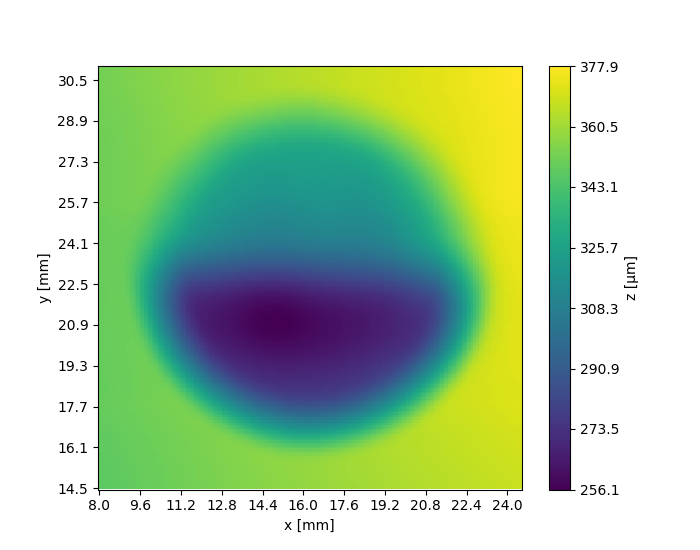

<IPython.core.display.Javascript object>


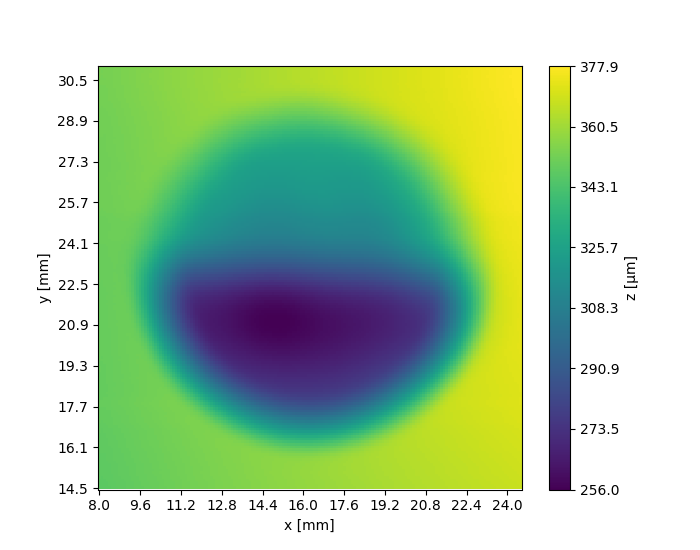

<IPython.core.display.Javascript object>


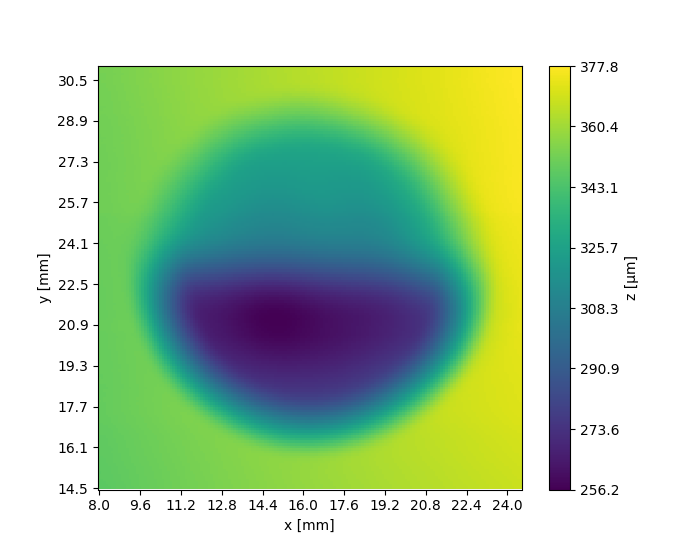

<IPython.core.display.Javascript object>


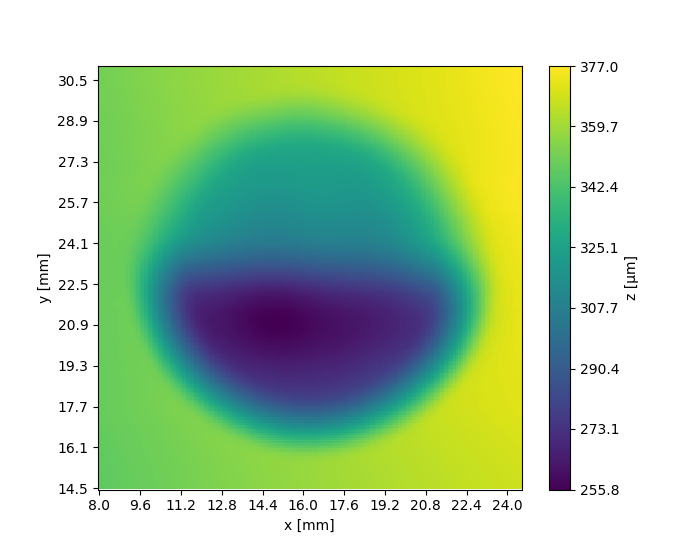

<IPython.core.display.Javascript object>


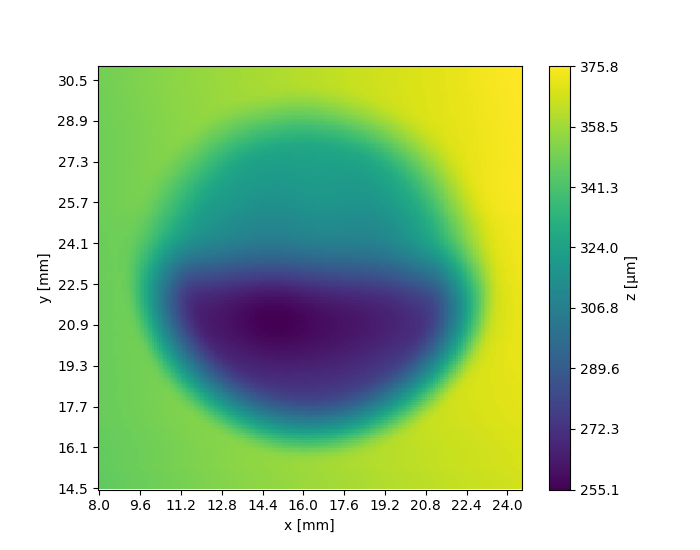

In [12]:
for zi in z:
    fig, ax = plot(x, y, zi[0])

<IPython.core.display.Javascript object>


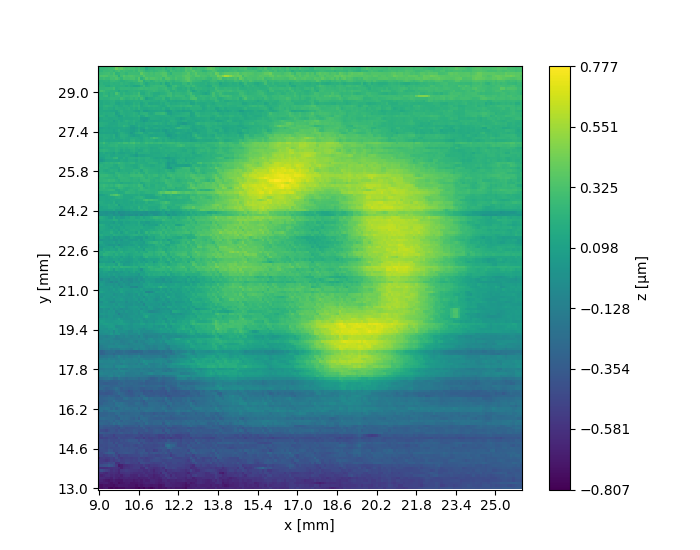

<IPython.core.display.Javascript object>


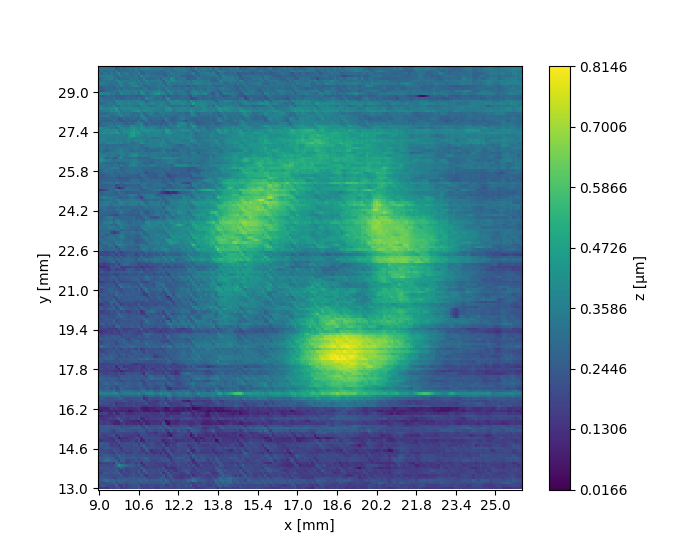

<IPython.core.display.Javascript object>


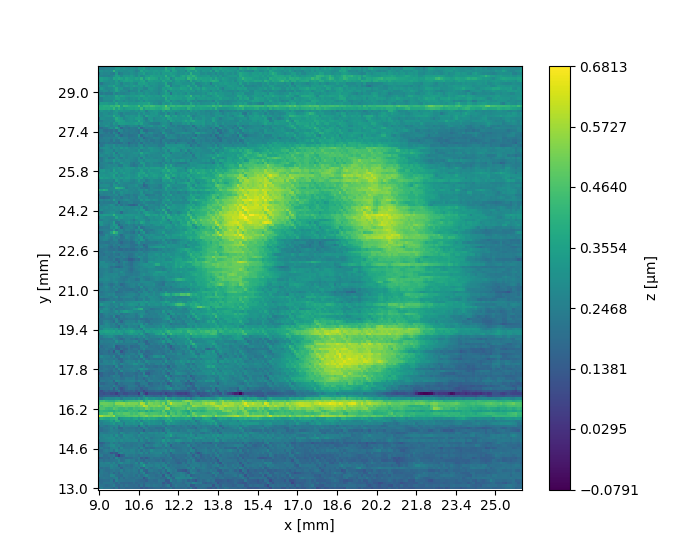

<IPython.core.display.Javascript object>


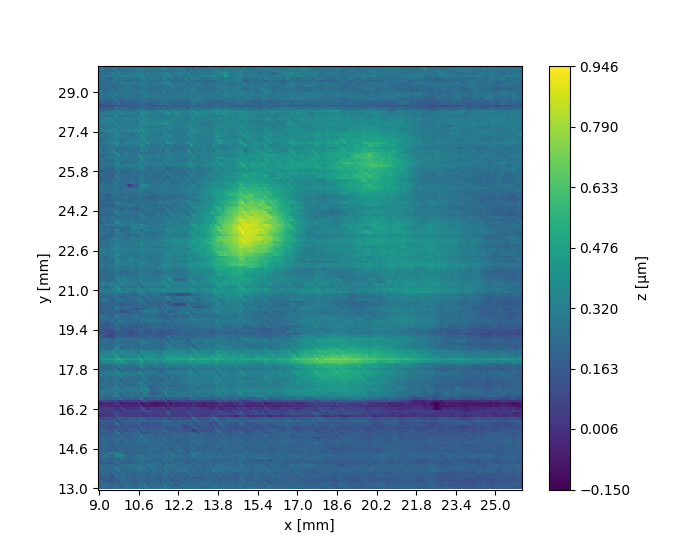

1.01982156636


In [19]:
s = 0
for zi, zj in zip(z, z[1:]):
    d = zi[0] - zj[0]
    s += d.max()
    fig, ax = plot(x, y, zj[0] - zi[0])
print(s)

<IPython.core.display.Javascript object>


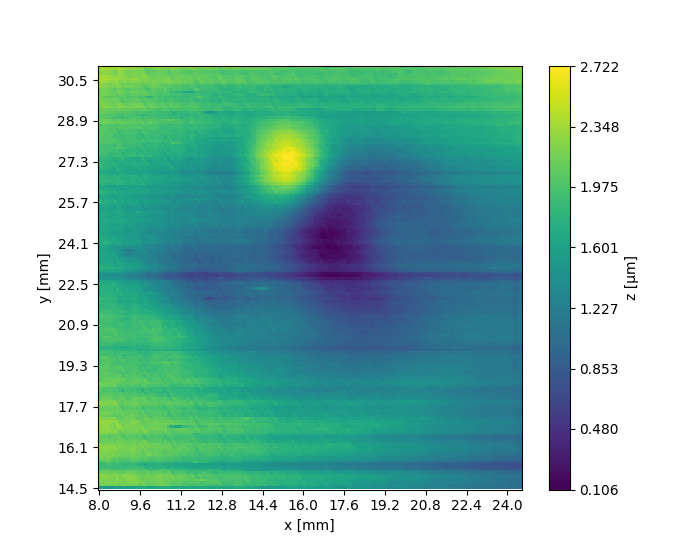

(<matplotlib.figure.Figure at 0x7fedb1c6fe80>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fedb1e76780>)

In [14]:
plot(x, y, z[0][0] - z[-1][0])

In [18]:
profile = ProfileBuilder(fig, ax)

<IPython.core.display.Javascript object>


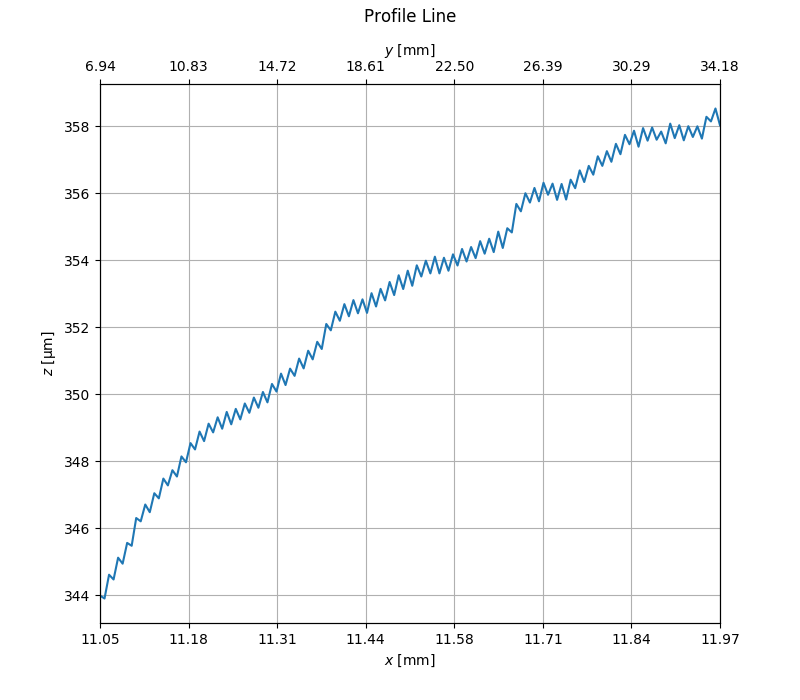

In [19]:
_ = plot_profile(x, y, z[0][0], *profile.coords)